In [1]:
import pandas as pd
import seaborn as sns

In [ ]:
"""
Hãy phân tích tác động của điểm toán với điểm DH1, DH2, DH3 dựa trên GT, KV, KT, DT, biết rằng mặc định DT là Kinh
"""

"""
b1: xử lý cơ bản
    1. xác định số lượng biến số tham gia
    2. thu thập dữ liệu
    3. Tổng quan dữ liệu
    4. xứ lý cơ bản
    - loại bỏ dòng trống
    - loại bỏ dòng trùng
    - khảo sát dữ liệu thiếu và điền thiếu
    5. Kiểm tra dữ liệu
"""

In [6]:
df = pd.read_csv('dulieuxettuyendaihoc.csv', header = 0, delimiter=',', encoding='unicode_escape')

df.dropna(how='all', inplace=True)
df.drop_duplicates(inplace=True)
df['DT'].fillna('Kinh', inplace=True)
df = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6','DH1', 'DH2', 'DH3', 'GT', 'KV', 'KT', 'DT']]
df

,T1,T2,T3,T4,T5,T6,DH1,DH2,DH3,GT,KV,KT,DT
0,7.2,8.4,7.4,7.2,7.4,6.9,3.25,3.25,4.50,F,2NT,A1,Kinh
1,5.4,6.3,4.3,4.9,3.0,4.0,6.00,4.00,3.50,M,1,C,Kinh
2,5.6,5.0,2.8,6.1,4.8,5.7,5.00,6.75,4.00,M,1,C,Kinh
3,6.6,5.1,5.9,4.1,6.1,7.4,4.25,4.25,5.25,M,1,D1,Kinh
4,6.0,5.4,7.6,4.4,6.8,8.0,4.25,4.50,5.00,M,2NT,A,Kinh
5,9.3,9.6,7.1,8.5,8.5,7.8,1.50,4.00,6.00,M,1,D1,Kinh
6,2.8,4.4,4.6,4.7,5.4,5.3,6.50,6.75,5.25,F,2,C,Kinh
7,8.3,6.7,8.6,8.3,8.5,8.3,3.75,4.50,4.25,F,2,D1,Kinh
8,6.5,7.3,6.4,8.1,7.7,7.7,3.50,3.50,6.75,F,1,D1,Kinh
9,7.3,8.0,6.5,5.5,7.5,6.9,4.00,4.75,5.50,F,1,D1,Kinh


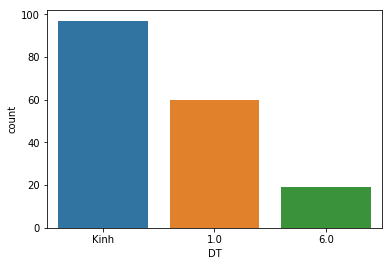

In [14]:
"""Hãy trực quan số lượng sinh viên theo giới tính"""

from numpy import count_nonzero
sns.countplot(x='DT', data=df)

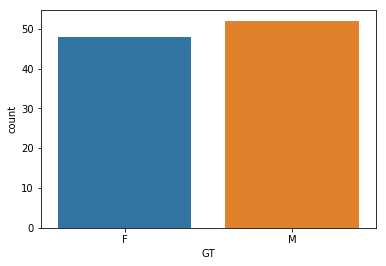

In [15]:

sns.countplot(x='GT', data=df)

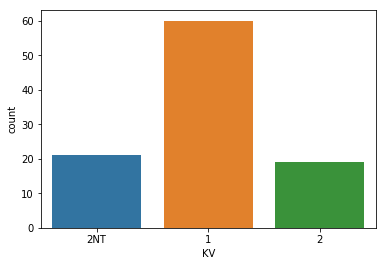

In [16]:

sns.countplot(x='KV', data=df)

In [ ]:
"""
Hãy so sánh số lượng học sinh dự thi theo nhóm giới tính
"""

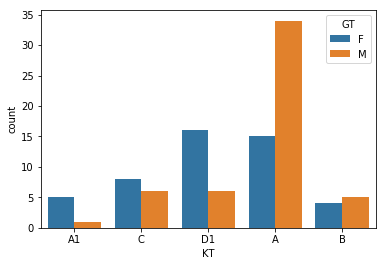

In [17]:
sns.countplot(x='KT', hue='GT', data=df)

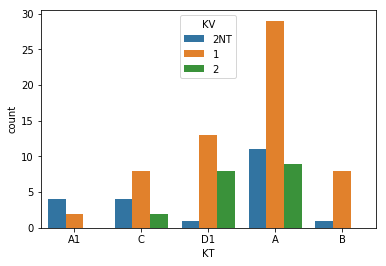

In [18]:
sns.countplot(x='KT', hue='KV', data=df)

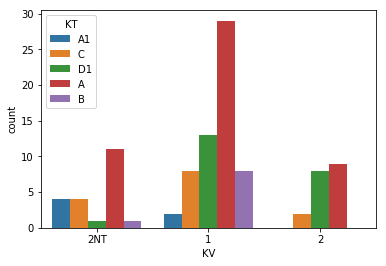

In [19]:
sns.countplot(x='KV', hue='KT', data=df)

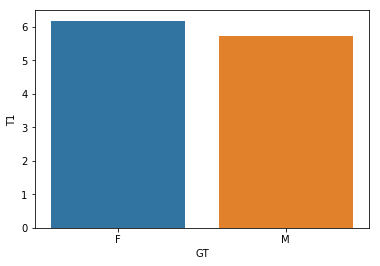

In [20]:
"""
Hãy so sánh điểm toán học kì 1 năm lớp 10 của nhóm giới tính
"""
sns.barplot(x="GT", y='T1', data=df, ci=None)

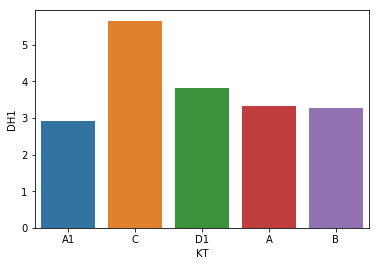

In [22]:
"""
Hãy so sánh điểm trung binfh DH1 trene nnhóm khối thi
"""
sns.barplot(x="KT", y='DH1', data=df, ci=None)

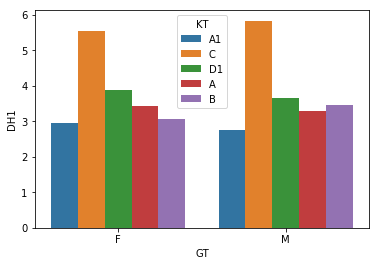

In [27]:
'''So sánh điểm trung bình DH1 theo nhóm giới tính dựa trên khối thi'''
sns.barplot(x='GT', y='DH1', hue='KT', data=df, ci=None)
# plt.show()